In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../005_src/') #use relative path
#os.chdir("../005_src")

from config import *

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA not available, running on cpu


In [26]:
this_date = "20210711"
ts = "22h04m22s"
GCN_num = "007"
this_GCN = f"GCN_{GCN_num}"

In [27]:
if GCN_num == "006": 
    from _03_Networks.GCN_006.GCN_model_006 import *
    check_import()
    from _03_Networks.GCN_006.GCN_trainer_006 import *

elif GCN_num == "007": 
    from _03_Networks.GCN_007.GCN_model_007 import *
    check_import()
    from _03_Networks.GCN_007.GCN_trainer_007 import *
    
elif GCN_num == "008": 
    from _03_Networks.GCN_008.GCN_model_008 import *
    check_import()
    from _03_Networks.GCN_008.GCN_trainer_008 import *

imported model: GCN_007 at 22h55m37s
edges_attr=True


## RELOAD

In [28]:

MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

dateset_test_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/dataset_test"
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

dateset_test = pkl.load(open(f'{dateset_test_path}.pkl',"rb"))

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
#reloaded_dict

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_007/20210711-22h04m22s/


In [29]:
# load losses
t_losses_load = pkl.load(open( reloaded_dict['train_losses_path'], 'rb'))
v_losses_load = pkl.load(open( reloaded_dict['val_losses_path'], 'rb'))

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_007/20210711-22h04m22s/20210711-22h04m22s_train_val_loss_plot.png


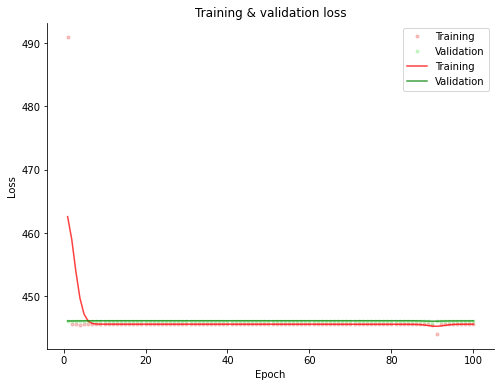

In [30]:
##================================
# TRAIN AND VAL LOSSES
##================================
fig = plot_training(t_losses_load,
                  v_losses_load,
                  learning_rate = None,
                  gaussian=True,
                  sigma=2,
                  figsize=(8, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

## Verification
of results

In [8]:
# load model
# defining the model
load_model = GCN(num_input_features=reloaded_dict['size_input'],
            num_output_features =reloaded_dict['size_output'],
            random_seed = 42,
            hc_1 = 64,
           )


In [9]:
load_path = reloaded_dict['model_path']
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

GCN(
  (conv1): GCNConv(5, 64)
  (conv2): GCNConv(64, 2)
)

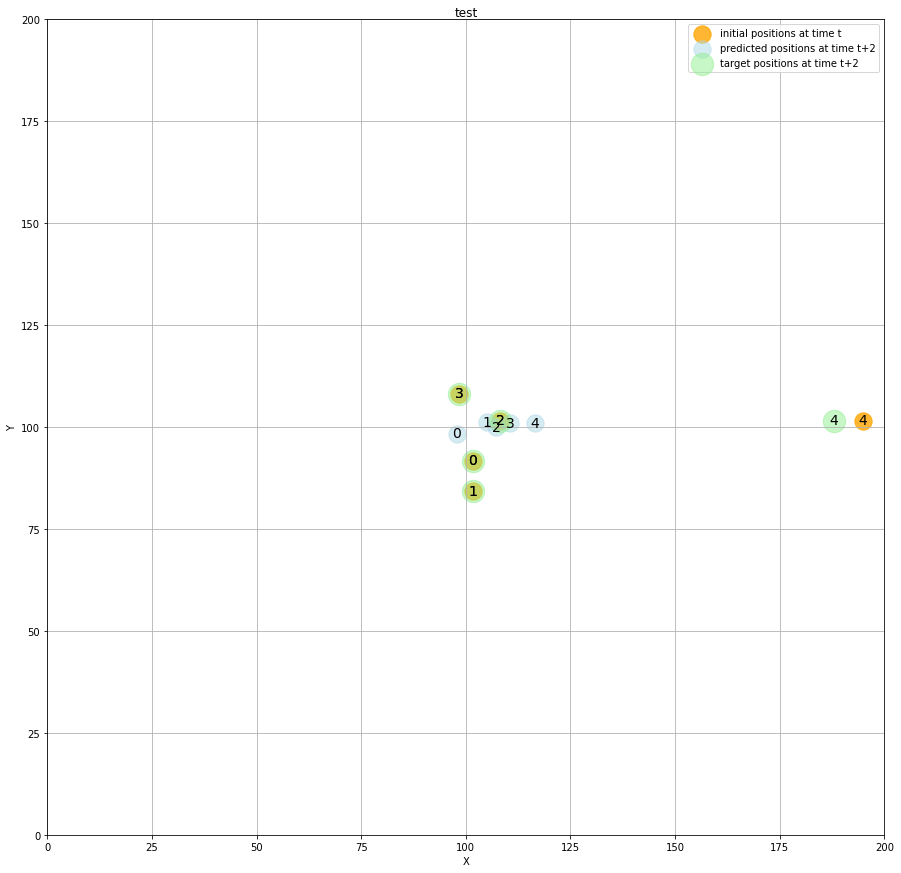

In [10]:
plot_results_model(
                   load_model, 
                   dateset_test[0],
                   start_from = 0,
                   end_at = 10,
                   edges_attr = False,
                   figsize = (15,15),
                   plot_input = True,
                   plot_target = True,
                   plot_prediction = True,
                   plot_intention = False, 
                   title = "test",
                  )

In [11]:
reloaded_dict

{'input_file_name': '20210710-20h38m27s_timesteps14930_ec3500_em7000',
 'max_num_veh': 10,
 'sim_duration_timesteps': '15000',
 'run_time': '18h27m15s',
 'model': 'GCN_008',
 'random_seed': 42,
 'train_size': 0.9,
 'batch_size': 8,
 'Nepochs': 100,
 'save_every': 50,
 'transformstat': False,
 'plotstat': True,
 'printstat': True,
 'intentionstat': True,
 'num_rows_training': 10588,
 'num_rows_validation': 1059,
 'num_rows_test': 118,
 'exclude_yaw': True,
 'concatenatestat': True,
 'paddingstat': False,
 'size_input': 5,
 'size_output': 2,
 'model_architecture': GCN(
   (conv1): GCNConv(5, 64)
   (conv2): GCNConv(64, 2)
 ),
 'criterion': MSELoss(),
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.001
     weight_decay: 0
 ),
 'model_path': '/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_008/20210711-18h27m15s/20210711-18h27m15sEPOCH_100of100_FINAL__GCN_008.pt',
 'train_losses_path': '/storage/remote

In [12]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.25,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

0it [00:00, ?it/s]

found 10 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_008/20210711-18h27m15s/figures/
the gif will be create using the first 10 images


10it [00:01,  5.18it/s]


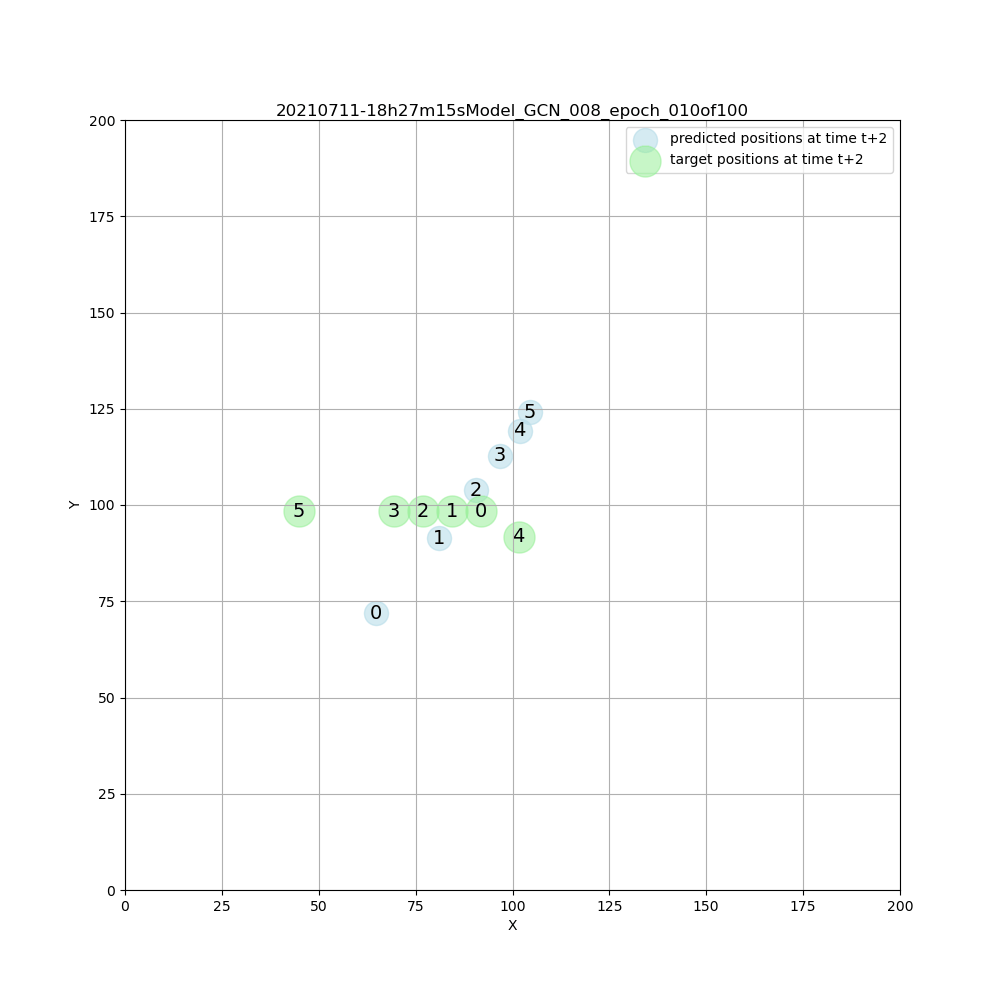

In [13]:
Image(open(f'{path_GIF}','rb').read())

In [14]:
deleted_folders = delete_empty_r(directory= OUTPUT_DIR,printstat = True)